In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
PROJECT_PATH = '../'
import sys
sys.path.insert(0, PROJECT_PATH)

In [10]:
from lv.dnn.dnn_R0 import DNN_R0

In [4]:
W, R0="RML", "B"
ddp = DNN_R0(R0, top=100, pdx=[0,1,2], N_test=1000, step=20)

In [13]:
ddp.prepare_R0(R0, N_train=10000)

In [27]:
ddp.run_R0(R0, ep=1000, dp=0.1)

Layers: [100, 64, 32, 16, 3]
| EP 1000 |loss: 0.0610 | mean_: 0.0610 | val_l: 0.0269 | val_m: 0.0269 | lr: 0.0100 | 


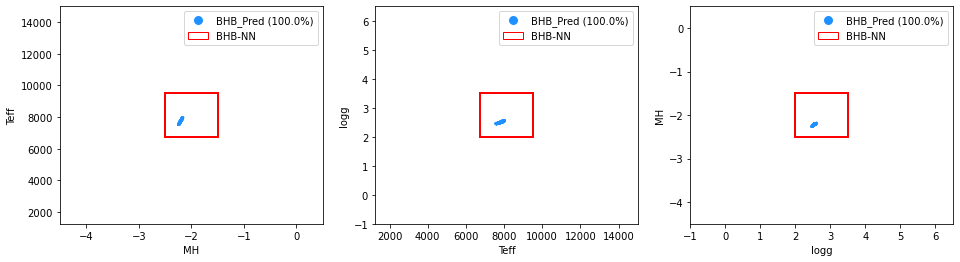

In [23]:
ddp.plot_box_R0_R1(R0,R0)

In [28]:
ddp.dCT

{'B': {'M': 0.0, 'W': 0.084, 'C': 0.0, 'B': 0.956, 'R': 0.0, 'G': 0.0}}

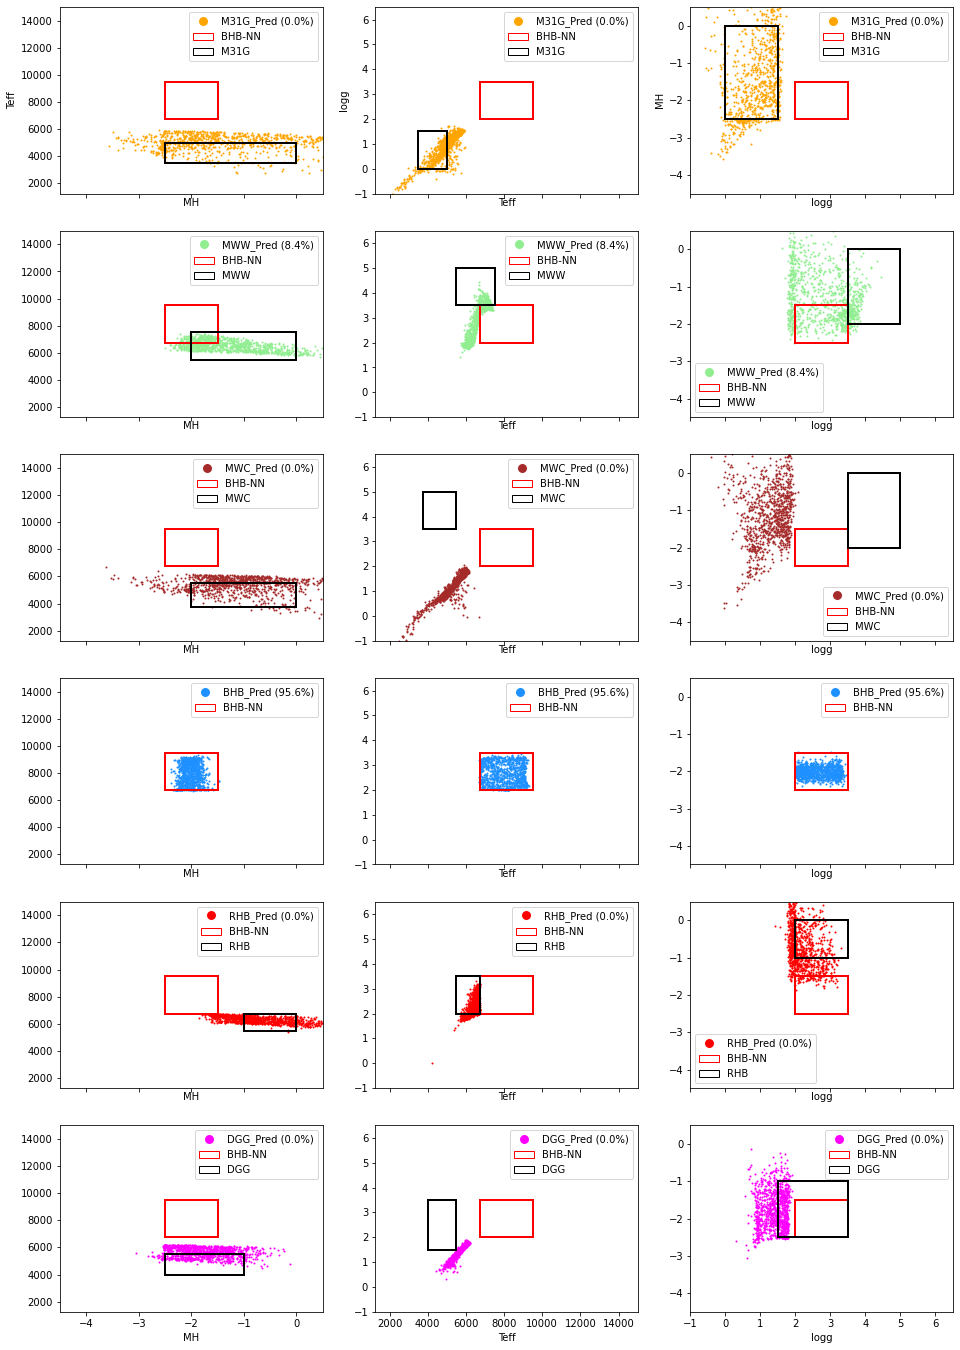

In [32]:
ddp.plot_box_R0(R0)

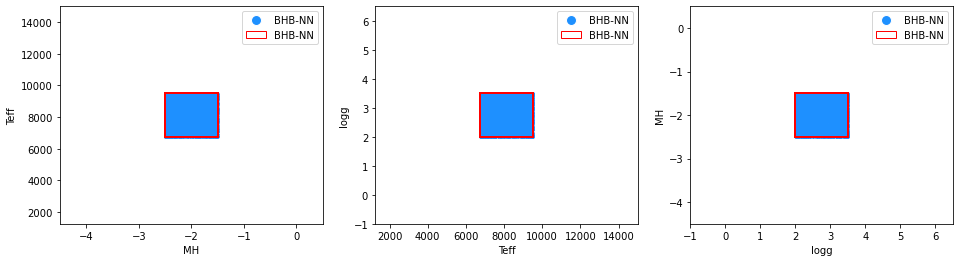

In [140]:
ddp.plot_nsbox_R0_R1(R0,R0, ddp.p_trains[R0])

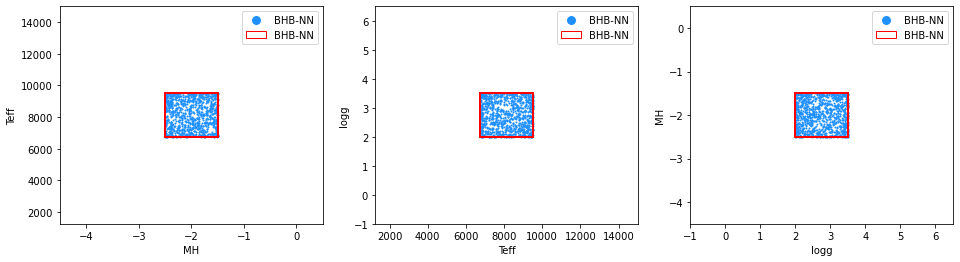

In [141]:
ddp.plot_nsbox_R0_R1(R0,R0, ddp.p_tests[R0])

In [33]:
wave, flux, err, pval, snr = ddp.load_RBF_W_R("RML", "B", 1000)

In [ ]:
snr.max

In [ ]:
flu

In [123]:

getSN(nsfluxs[0])

23.496567859236094

In [36]:
import numpy as np

In [39]:
def plot_SN(SNval=30, R="B", rate=1):
    nsdx = np.where(abs(snr-SNval) < 0.1)[0][0]
    Ps = pval[nsdx]
    nsfluxs = ddp.add_noise_N(flux[nsdx], err[nsdx], 1000, rate=rate)
    p_pred = ddp.predict_nsflux(nsfluxs, R, dnn=ddp.dnns[R])    
    ddp.ns_preds={R: {}}
    ddp.ns_preds[R] = {R: p_pred}
    if rate == 1: 
        SN = snr[nsdx][2]
    else:
        SN = getSNs(nsfluxs)
    ddp.plot_box_R0_R1(R, R, SN=np.around(SN), Ps=Ps)

In [40]:
for r in [ 0.2,0.4,0.5,0.7,
          1]:
    plot_SN(rate=r)    

AttributeError: 'DNN_R0' object has no attribute 'transform_R'

In [148]:
ddp.wave.shape

(204,)

In [ ]:
1. generate for all boxs
2. contamination 
3. probablity distance.


In [ ]:
idies
1. poster (breakout)
2. 1-slide ppt
3. present 


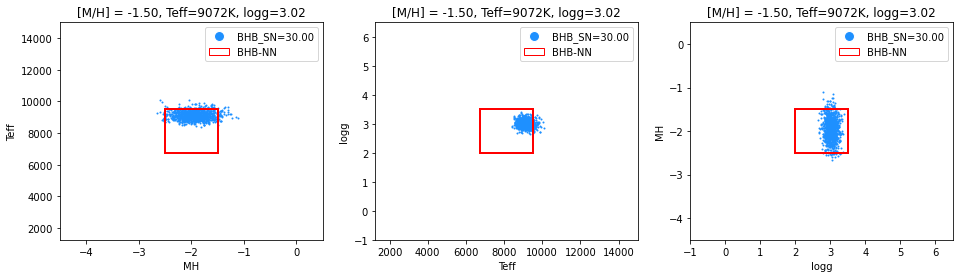

In [125]:
plot_SN(rate=1)

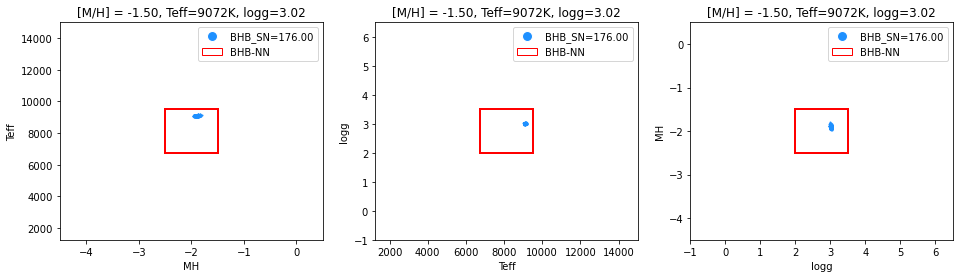

In [126]:
plot_SN(rate=0.1)

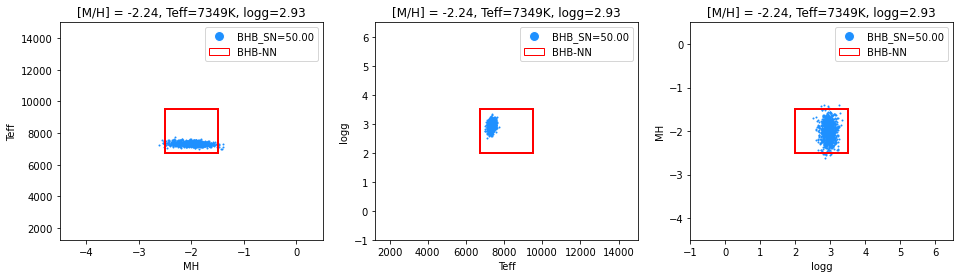

In [98]:
plot_SN(rate=0.1)

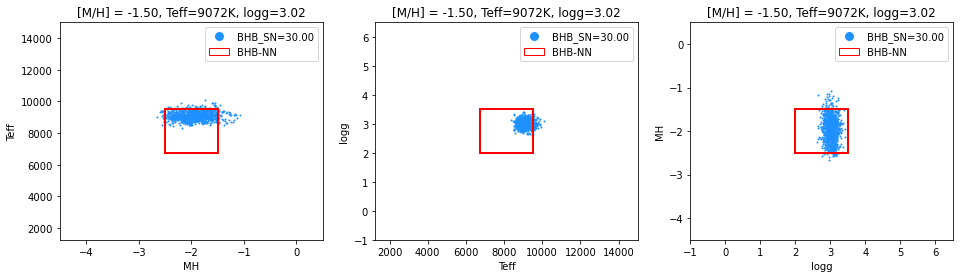

In [97]:
plot_SN(30)

In [73]:
nsfluxs

array([[0.70975033, 0.69885416, 0.68642001, ..., 0.43552164, 0.4063824 ,
        0.40647643],
       [0.71062034, 0.71101463, 0.69815146, ..., 0.42707722, 0.39511675,
        0.42342274],
       [0.71278123, 0.72367819, 0.71699387, ..., 0.425955  , 0.41570382,
        0.39613998],
       ...,
       [0.69932924, 0.70634878, 0.70301174, ..., 0.44972037, 0.42857187,
        0.40451637],
       [0.72536325, 0.69877268, 0.71017326, ..., 0.42125419, 0.43632327,
        0.38599267],
       [0.72299911, 0.69502229, 0.70350379, ..., 0.42589485, 0.40170587,
        0.38872707]])

In [74]:
dnn = ddp.dnns[R0]

In [77]:
p_pred = ddp.predict_nsflux(nsfluxs, "B", dnn=dnn)

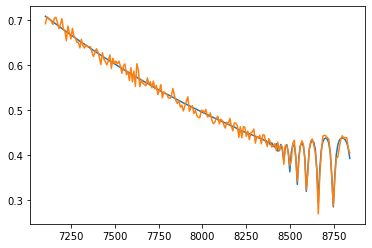

In [51]:
plt.plot(wave, flux0)
plt.plot(wave, fluxx)